# Part I: Load data

## Load data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

wineData = load_wine()

## Identify Key aspects

In [2]:
numberOfSamples = wineData.data.shape[0]
numberOfDimensions = wineData.data.shape[1]
numberOfClasses = wineData.target_names.shape[0]
targetNames = wineData.target_names

# https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html
class0Count = np.count_nonzero(wineData.target == 0) 
class1Count = np.count_nonzero(wineData.target == 1)
class2Count = np.count_nonzero(wineData.target == 2)

print("Number of samples/instances: ", numberOfSamples)
print("Number of dimensions: ", numberOfDimensions)
print("Number of classes: ", numberOfClasses)
print("Names of classes: ", targetNames)
print("Samples per class: class_0 - {}, class_1 - {}, class_2 - {}".format(class0Count, class1Count, class2Count))

Number of samples/instances:  178
Number of dimensions:  13
Number of classes:  3
Names of classes:  ['class_0' 'class_1' 'class_2']
Samples per class: class_0 - 59, class_1 - 71, class_2 - 48


# Part II: Clustering 

## Clustering methods used

Mention the clustering methods used below. You should not describe them, but if they have not been discussed in the class, you should cite the source:


1.   K-Means
2.   GMM
3.   Agglomerative Clustering
4.   Spectral Clustering
5.   Mean Shift
6.   Optics

## Function Definition

In [3]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, v_measure_score, adjusted_rand_score

#Function for calculating Internal and External Evaluation Metrics 

def calculateScores(modelLabels, predClasses):
    Sscore = silhouette_score(wineData.data, modelLabels, metric='euclidean')
    CHscore = calinski_harabasz_score(wineData.data, modelLabels)
    DBscore = davies_bouldin_score(wineData.data, modelLabels)
    print("Internal Evaluation:")
    print("Silhouetter Score: %.3f" % Sscore)
    print("Calinski Harabasz Score: %.3f" % CHscore)
    print("Davies Bouldin Score: %.3f" % DBscore)
    print("\nExternal Evaluation:")

    VMcore = v_measure_score(wineData.target, predClasses)
    ARscore = adjusted_rand_score(wineData.target, predClasses)
    print("V Measure Score: %.3f" % DBscore)
    print("Adjusted Rand Index: %.3f" % ARscore)

## K - Means

### Training

In [4]:
from sklearn.cluster import KMeans

kMeansModel = KMeans()
kMeansModel.fit(wineData.data)

KMeans()

In [5]:
kMeansModel_1 = KMeans(n_clusters=3)
kMeansModel_1.fit(wineData.data)

KMeans(n_clusters=3)

### Evaluation

In [6]:
predictedClasses = kMeansModel.predict(wineData.data)

print("Evaluation metrics for K-Means Clustering with default parameters\n")
calculateScores(kMeansModel.labels_, predictedClasses)

Evaluation metrics for K-Means Clustering with default parameters

Internal Evaluation:
Silhouetter Score: 0.540
Calinski Harabasz Score: 1297.530
Davies Bouldin Score: 0.497

External Evaluation:
V Measure Score: 0.497
Adjusted Rand Index: 0.198


In [7]:
predictedClasses = kMeansModel_1.predict(wineData.data)

print("Evaluation metrics for K-Means Clustering with n_clusters = 3\n")
calculateScores(kMeansModel_1.labels_, predictedClasses)

Evaluation metrics for K-Means Clustering with n_clusters = 3

Internal Evaluation:
Silhouetter Score: 0.571
Calinski Harabasz Score: 561.816
Davies Bouldin Score: 0.534

External Evaluation:
V Measure Score: 0.534
Adjusted Rand Index: 0.371


## GMM

### Training

In [8]:
from sklearn import mixture

gmmModels = [ 
    ("Full", mixture.GaussianMixture(n_components=2, covariance_type="full").fit(wineData.data)),
    ("Spherical", mixture.GaussianMixture(n_components=2, covariance_type="spherical").fit(wineData.data)), 
    ("Tied", mixture.GaussianMixture(n_components=2, covariance_type="tied").fit(wineData.data)),
    ("Diag", mixture.GaussianMixture(n_components=2, covariance_type="diag").fit(wineData.data))
    ]
  

### Evaluation

In [9]:
# from sklearn import preprocessing

sscoreList = []
CHscoreList = []
DBscoreList = []
VMscoreList = []
ARscoreList = []

for idx, ((name, est)) in enumerate(gmmModels):
    print("\n")
    print("Evalvuation Metrics for Covariance Type : " + name + "\n")
    
    predictedClasses = est.predict(wineData.data)
    
    Sscore = silhouette_score(wineData.data, predictedClasses, metric='euclidean')
    sscoreList.append(Sscore)
    CHscore = calinski_harabasz_score(wineData.data, predictedClasses)
    CHscoreList.append(CHscore)
    DBscore = davies_bouldin_score(wineData.data, predictedClasses)
    DBscoreList.append(DBscore)
    print("Internal Evaluation:")
    print("Silhouetter Score: %.3f" % Sscore)
    print("Calinski Harabasz Score: %.3f" % CHscore)
    print("Davies Bouldin Score: %.3f" % DBscore)

    print("\nExternal Evaluation:")
    VMscore = v_measure_score(wineData.target, predictedClasses)
    VMscoreList.append(VMscore)
    ARscore = adjusted_rand_score(wineData.target, predictedClasses)
    ARscoreList.append(ARscore)
    print("V Measure Score: %.3f" % DBscore)
    print("Adjusted Rand Index: %.3f" % ARscore)



Evalvuation Metrics for Covariance Type : Full

Internal Evaluation:
Silhouetter Score: 0.564
Calinski Harabasz Score: 358.804
Davies Bouldin Score: 0.571

External Evaluation:
V Measure Score: 0.571
Adjusted Rand Index: 0.520


Evalvuation Metrics for Covariance Type : Spherical

Internal Evaluation:
Silhouetter Score: 0.646
Calinski Harabasz Score: 492.983
Davies Bouldin Score: 0.500

External Evaluation:
V Measure Score: 0.500
Adjusted Rand Index: 0.420


Evalvuation Metrics for Covariance Type : Tied

Internal Evaluation:
Silhouetter Score: 0.595
Calinski Harabasz Score: 397.031
Davies Bouldin Score: 0.535

External Evaluation:
V Measure Score: 0.535
Adjusted Rand Index: 0.561


Evalvuation Metrics for Covariance Type : Diag

Internal Evaluation:
Silhouetter Score: 0.539
Calinski Harabasz Score: 284.086
Davies Bouldin Score: 0.627

External Evaluation:
V Measure Score: 0.627
Adjusted Rand Index: 0.473


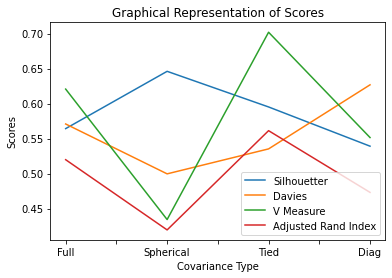

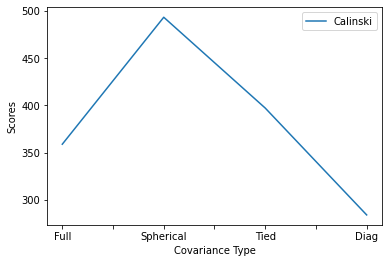

In [10]:
setLabel = ["Full","Spherical","Tied","Diag"]
df = pd.DataFrame({
   'Silhouetter': sscoreList,
   'Davies': DBscoreList,
   'V Measure': VMscoreList,
   'Adjusted Rand Index': ARscoreList
   }, index=setLabel)
df_cal = pd.DataFrame({
  'Calinski':CHscoreList
   }, index=setLabel)
lines = df.plot.line(title = 'Graphical Representation of Scores', ylabel = 'Scores',  xlabel = 'Covariance Type')
linesCal = df_cal.plot.line(ylabel = 'Scores',  xlabel = 'Covariance Type')

## Agglomerative Clustering

### Training

In [11]:
from sklearn.cluster import AgglomerativeClustering

acModel = AgglomerativeClustering(n_clusters=3)
acModel.fit(wineData.data)

AgglomerativeClustering(n_clusters=3)

In [12]:
acModel_1 = AgglomerativeClustering(n_clusters=3, linkage='average')
acModel_1.fit(wineData.data)

AgglomerativeClustering(linkage='average', n_clusters=3)

### Evaluation

In [13]:
predictedClasses = acModel.fit_predict(wineData.data)

print("Evaluation metrics for Agglomerative Clustering with default linkage(ward)\n")
calculateScores(acModel.labels_, predictedClasses)

Evaluation metrics for Agglomerative Clustering with default linkage(ward)

Internal Evaluation:
Silhouetter Score: 0.564
Calinski Harabasz Score: 552.852
Davies Bouldin Score: 0.536

External Evaluation:
V Measure Score: 0.536
Adjusted Rand Index: 0.368


In [14]:
predictedClasses = acModel_1.fit_predict(wineData.data)

print("Evaluation metrics for Agglomerative Clustering with linkage = average\n")
calculateScores(acModel_1.labels_, predictedClasses)

Evaluation metrics for Agglomerative Clustering with linkage = average

Internal Evaluation:
Silhouetter Score: 0.610
Calinski Harabasz Score: 306.971
Davies Bouldin Score: 0.428

External Evaluation:
V Measure Score: 0.428
Adjusted Rand Index: 0.293


## Spectral Clustering

### Training

In [15]:
from sklearn.cluster import SpectralClustering


# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

scModel = SpectralClustering(n_clusters = 3)
scModel.fit(wineData.data)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(


SpectralClustering(n_clusters=3)

In [16]:
scModel_1 = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
scModel_1.fit(wineData.data)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

### Evaluation

In [17]:
predictedClasses = scModel.fit_predict(wineData.data)
print("Evaluation metrics for Spectral Clustering with default affinity(rbf) \n")
calculateScores(scModel.labels_, predictedClasses)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Evaluation metrics for Spectral Clustering with default affinity(rbf) 

Internal Evaluation:
Silhouetter Score: 0.280
Calinski Harabasz Score: 3.369
Davies Bouldin Score: 0.448

External Evaluation:
V Measure Score: 0.448
Adjusted Rand Index: 0.000


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(


In [18]:
predictedClasses = scModel_1.fit_predict(wineData.data)
print("Evaluation metrics for Spectral Clustering with affinity = nearest_neighbors\n")
calculateScores(scModel_1.labels_, predictedClasses)

Evaluation metrics for Spectral Clustering with affinity = nearest_neighbors

Internal Evaluation:
Silhouetter Score: 0.557
Calinski Harabasz Score: 533.858
Davies Bouldin Score: 0.529

External Evaluation:
V Measure Score: 0.529
Adjusted Rand Index: 0.359


## Mean Shift

### Training

In [19]:
from sklearn.cluster import MeanShift

meanShiftModel = MeanShift()
meanShiftModel.fit(wineData.data)

MeanShift()

In [20]:
meanShiftModel_1 = MeanShift(bin_seeding=True)
meanShiftModel_1.fit(wineData.data)

MeanShift(bin_seeding=True)

### Evaluation

In [21]:
predictedClasses = meanShiftModel.predict(wineData.data)

print("Evaluation metrics for Mean Shift Clustering with default parameters \n")
calculateScores(meanShiftModel.labels_, predictedClasses)

Evaluation metrics for Mean Shift Clustering with default parameters 

Internal Evaluation:
Silhouetter Score: 0.502
Calinski Harabasz Score: 454.059
Davies Bouldin Score: 0.556

External Evaluation:
V Measure Score: 0.556
Adjusted Rand Index: 0.397


In [22]:
predictedClasses = meanShiftModel_1.predict(wineData.data)

print("Evaluation metrics for Mean Shift Clustering with bin_seeding = True")
calculateScores(meanShiftModel_1.labels_, predictedClasses)

Evaluation metrics for Mean Shift Clustering with bin_seeding = True
Internal Evaluation:
Silhouetter Score: 0.634
Calinski Harabasz Score: 470.846
Davies Bouldin Score: 0.511

External Evaluation:
V Measure Score: 0.511
Adjusted Rand Index: 0.451


## Optics

### Training

In [23]:
from sklearn.cluster import OPTICS

opticsModels = [ 
    ("min_samples = 20", OPTICS(min_samples=20).fit(wineData.data)),
    ("min_samples = 25", OPTICS(min_samples=25).fit(wineData.data)), 
    ("min_samples = 30", OPTICS(min_samples=30).fit(wineData.data)),
    ("min_samples = 35", OPTICS(min_samples=35).fit(wineData.data))
    ]


### Evaluation

In [24]:
sscoreList = []
CHscoreList = []
DBscoreList = []
VMscoreList = []
ARscoreList = []

for idx, ((name, est)) in enumerate(opticsModels):
    print("\n")
    print("Evalvuation Metrics for OPTICS with " + name + " : \n")
    
    predictedClasses = est.fit_predict(wineData.data)
    
    Sscore = silhouette_score(wineData.data, predictedClasses, metric='euclidean')
    sscoreList.append(Sscore)
    CHscore = calinski_harabasz_score(wineData.data, predictedClasses)
    CHscoreList.append(CHscore)
    DBscore = davies_bouldin_score(wineData.data, predictedClasses)
    DBscoreList.append(DBscore)
    print("Internal Evaluation:")
    print("Silhouetter Score: %.3f" % Sscore)
    print("Calinski Harabasz Score: %.3f" % CHscore)
    print("Davies Bouldin Score: %.3f" % DBscore)

    print("\nExternal Evaluation:")
    VMscore = v_measure_score(wineData.target, predictedClasses)
    VMscoreList.append(VMscore)
    ARscore = adjusted_rand_score(wineData.target, predictedClasses)
    ARscoreList.append(ARscore)
    print("V Measure Score: %.3f" % DBscore)
    print("Adjusted Rand Index: %.3f" % ARscore)



Evalvuation Metrics for OPTICS with min_samples = 20 : 

Internal Evaluation:
Silhouetter Score: -0.071
Calinski Harabasz Score: 27.252
Davies Bouldin Score: 1.051

External Evaluation:
V Measure Score: 1.051
Adjusted Rand Index: 0.058


Evalvuation Metrics for OPTICS with min_samples = 25 : 

Internal Evaluation:
Silhouetter Score: 0.165
Calinski Harabasz Score: 52.793
Davies Bouldin Score: 0.833

External Evaluation:
V Measure Score: 0.833
Adjusted Rand Index: 0.058


Evalvuation Metrics for OPTICS with min_samples = 30 : 

Internal Evaluation:
Silhouetter Score: 0.637
Calinski Harabasz Score: 434.922
Davies Bouldin Score: 0.506

External Evaluation:
V Measure Score: 0.506
Adjusted Rand Index: 0.377


Evalvuation Metrics for OPTICS with min_samples = 35 : 

Internal Evaluation:
Silhouetter Score: 0.197
Calinski Harabasz Score: 61.069
Davies Bouldin Score: 0.812

External Evaluation:
V Measure Score: 0.812
Adjusted Rand Index: 0.070


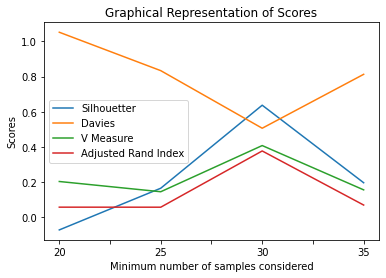

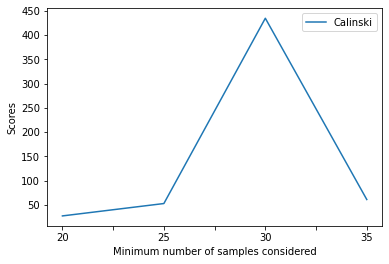

In [25]:
setLabel = ["20","25","30","35"]
df = pd.DataFrame({
   'Silhouetter': sscoreList,
   'Davies': DBscoreList,
   'V Measure': VMscoreList,
   'Adjusted Rand Index': ARscoreList
   }, index=setLabel)
df_cal = pd.DataFrame({
  'Calinski':CHscoreList
   }, index=setLabel)
lines = df.plot.line(title = 'Graphical Representation of Scores', ylabel = 'Scores',  xlabel = 'Minimum number of samples considered')
linesCal = df_cal.plot.line(ylabel = 'Scores', xlabel = 'Minimum number of samples considered')

# Part III: Classification

## Classification methods used 

Mention the classification methods used below. You should not describe them, but if they have not been discussed in the class, you should cite the source:


1.   Decision Tree
2.   Random Forest
3.   SVC
4.   Gaussian Naive Bayes
5.   K Nearest Neighbors
6.   AdaBoost



## Split data protocol

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = wineData.data
y = wineData.target


X_train_split, X_test_split , y_train_split, y_test_split = train_test_split(X, y, test_size = 0.33, random_state=42)

### Initializations and Function Definitions

In [27]:
from sklearn.metrics._plot.roc_curve import RocCurveDisplay
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.metrics._plot.confusion_matrix import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer

combinedROCData = {}

# https://stackoverflow.com/questions/45118093/inverse-process-of-label-binarisation-in-python

# Binarize the output 
lb = LabelBinarizer()

#Function for split data protocol metrics evaluation
def printMetrics(y_test, y_predict, y_proba, model):
    balancedAccuracyScore = balanced_accuracy_score(y_test,y_predict)
    precisionScore = precision_score(y_test,y_predict, average  = 'weighted')
    recallScore = recall_score(y_test,y_predict, average  = 'weighted')
    f1Score = f1_score(y_test,y_predict, average  = 'weighted')
    rocAucScore = roc_auc_score(y_test, y_proba, multi_class='ovr')

    print("Balanced Accuracy Score: %.3f" % balancedAccuracyScore)
    print("Precision Score: %.3f" % precisionScore)
    print("Recall Score: %.3f" % recallScore)
    print("F1 Score: %.3f" % f1Score)
    print("ROC AUC Score: ", rocAucScore)
    print('\n         Confusion matrix')
    cm = confusion_matrix(y_test, y_predict,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
    disp.plot()


# Compute micro-average ROC curve and ROC area
def plot_roc_curve(test_y, proba_y, label):

    # https://www.kaggle.com/code/kanncaa1/roc-curve-with-k-fold-cv

    fpr_microAvg, tpr_microAvg, threshold = roc_curve(lb.fit_transform(test_y).ravel(), proba_y.ravel())

    roc_auc_microAvg = auc(fpr_microAvg, tpr_microAvg)
    plt.figure()
    plt.plot(fpr_microAvg, tpr_microAvg,
            label='AUC (area = {0:0.2f})'
                  ''.format(roc_auc_microAvg))
    
    combinedROCData[label] = (fpr_microAvg, tpr_microAvg, roc_auc_microAvg, label)
    plt.plot([0, 1], [0, 1], 'k--') # https://scikit-learn.org/0.15/auto_examples/plot_roc.html
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('\nROC Micro Average')
    plt.legend(loc="lower right")
    plt.show()


### Decision Tree

#### Training

In [28]:
decisionTreeModel = DecisionTreeClassifier(criterion='entropy')

decisionTreeModel.fit(X_train_split, y_train_split)

DecisionTreeClassifier(criterion='entropy')

In [29]:
decisionTreeModel_1 = DecisionTreeClassifier(criterion = 'gini', random_state=42)

decisionTreeModel_1.fit(X_train_split, y_train_split)

DecisionTreeClassifier(random_state=42)

#### Evaluation

Metric scores for Decision Tree with criterion = entropy: 

Balanced Accuracy Score: 0.869
Precision Score: 0.887
Recall Score: 0.881
F1 Score: 0.879
ROC AUC Score:  0.9043165168165168

         Confusion matrix


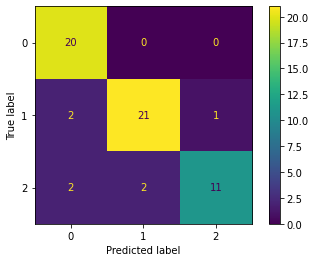

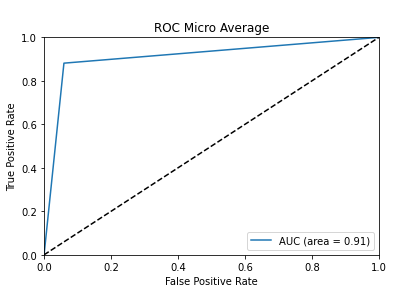

In [30]:
y_predict_split = decisionTreeModel.predict(X_test_split)
y_proba_split = decisionTreeModel.predict_proba(X_test_split)

print("Metric scores for Decision Tree with criterion = entropy: \n")
printMetrics(y_test_split, y_predict_split, y_proba_split, decisionTreeModel)


plot_roc_curve(y_test_split, y_proba_split, 'Decision Tree(Entropy)')

Metric scores for Decision Tree with criterion = gini: 

Balanced Accuracy Score: 0.961
Precision Score: 0.967
Recall Score: 0.966
F1 Score: 0.966
ROC AUC Score:  0.9715201465201465

         Confusion matrix


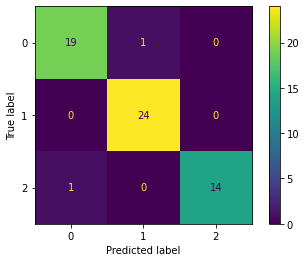

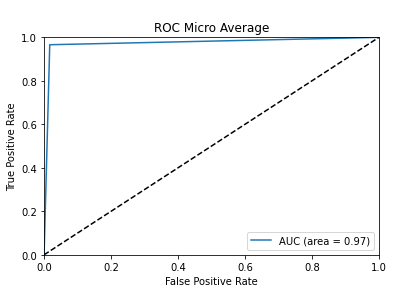

In [31]:
y_predict_split = decisionTreeModel_1.predict(X_test_split)
y_proba_split = decisionTreeModel_1.predict_proba(X_test_split)

print("Metric scores for Decision Tree with criterion = gini: \n")
printMetrics(y_test_split, y_predict_split, y_proba_split, decisionTreeModel_1)


plot_roc_curve(y_test_split, y_proba_split, 'Decision Tree(Gini)')

### Random Forest

#### Training

In [32]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(random_state=42)

randomForestModel.fit(X_train_split, y_train_split)

RandomForestClassifier(random_state=42)

#### Evaluation

Metric scores for Random Forest: 

Balanced Accuracy Score: 1.000
Precision Score: 1.000
Recall Score: 1.000
F1 Score: 1.000
ROC AUC Score:  1.0

         Confusion matrix


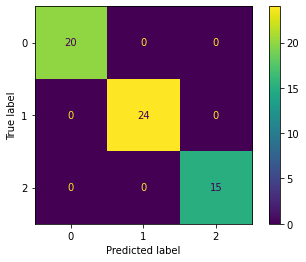

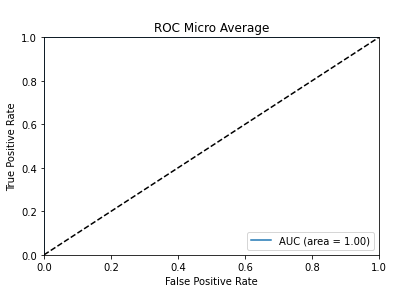

In [33]:
y_predict_split = randomForestModel.predict(X_test_split)
y_proba_split = randomForestModel.predict_proba(X_test_split)

print("Metric scores for Random Forest: \n")
printMetrics(y_test_split, y_predict_split, y_proba_split, randomForestModel)


plot_roc_curve(y_test_split, y_proba_split, 'Random Forest')


### SVC


#### Training

In [34]:
from sklearn.svm import SVC

svcRbfModel = SVC(kernel = 'rbf', random_state = 42, probability=True)

svcRbfModel.fit(X_train_split, y_train_split)

SVC(probability=True, random_state=42)

In [35]:
svcLinearModel = SVC(kernel = 'linear', random_state = 42, probability=True)

svcLinearModel.fit(X_train_split, y_train_split)

SVC(kernel='linear', probability=True, random_state=42)

#### Evaluation

Metric scores for SVC with kernel = RBF: 

Balanced Accuracy Score: 0.697
Precision Score: 0.716
Recall Score: 0.712
F1 Score: 0.713
ROC AUC Score:  0.8938311688311688

         Confusion matrix


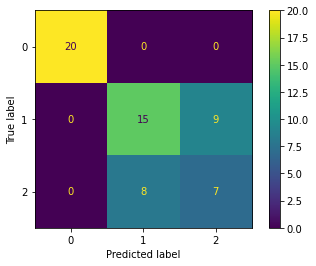

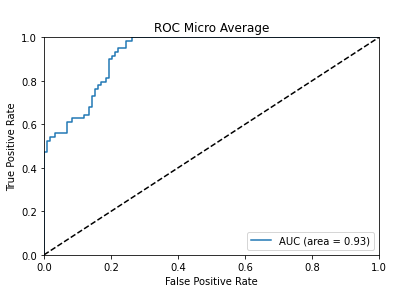

In [36]:
y_predict_split = svcRbfModel.predict(X_test_split)
y_proba_split = svcRbfModel.predict_proba(X_test_split)

print("Metric scores for SVC with kernel = RBF: \n")
printMetrics(y_test_split, y_predict_split, y_proba_split, svcRbfModel)

plot_roc_curve(y_test_split, y_proba_split, 'SVC RBF')

Metric scores for SVC with kernel = Linear: 

Balanced Accuracy Score: 0.986
Precision Score: 0.984
Recall Score: 0.983
F1 Score: 0.983
ROC AUC Score:  0.9996031746031746

         Confusion matrix


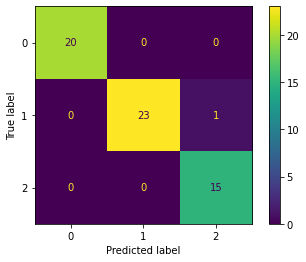

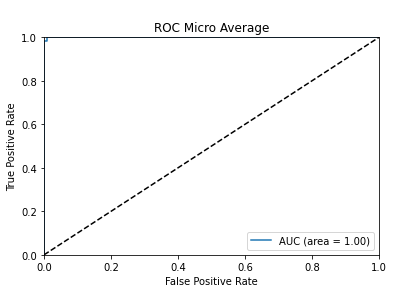

In [37]:
y_predict_split = svcLinearModel.predict(X_test_split)
y_proba_split = svcLinearModel.predict_proba(X_test_split)

print("Metric scores for SVC with kernel = Linear: \n")
printMetrics(y_test_split, y_predict_split, y_proba_split, svcLinearModel)

plot_roc_curve(y_test_split, y_proba_split, 'SVC Linear')

### Gaussian Naive Bayes


#### Training

In [38]:
from sklearn.naive_bayes import GaussianNB

gNbModel = GaussianNB()

gNbModel.fit(X_train_split, y_train_split)

GaussianNB()

#### Evaluation

Metric scores for Gaussian Naive Bayes

Balanced Accuracy Score: 1.000
Precision Score: 1.000
Recall Score: 1.000
F1 Score: 1.000
ROC AUC Score:  1.0

         Confusion matrix


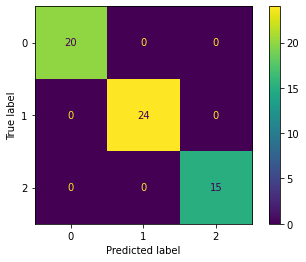

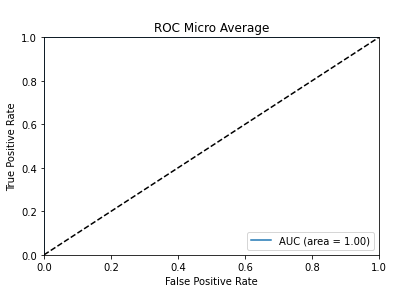

In [39]:
y_predict_split = gNbModel.predict(X_test_split)
y_proba_split = gNbModel.predict_proba(X_test_split)

print("Metric scores for Gaussian Naive Bayes\n")
printMetrics(y_test_split, y_predict_split, y_proba_split, gNbModel)

plot_roc_curve(y_test_split, y_proba_split, 'GNB')

### K Nearest Neighbors


#### Training

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier()

knnModel.fit(X_train_split, y_train_split)

KNeighborsClassifier()

In [41]:
knnModel_1 = KNeighborsClassifier(metric= 'canberra')

knnModel_1.fit(X_train_split, y_train_split)

KNeighborsClassifier(metric='canberra')

#### Evaluation

Metric scores for K-Nearest Neighbors with metric = minkowski: 

Balanced Accuracy Score: 0.661
Precision Score: 0.678
Recall Score: 0.678
F1 Score: 0.678
ROC AUC Score:  0.875467587967588

         Confusion matrix


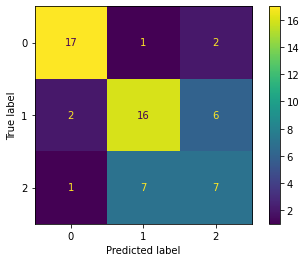

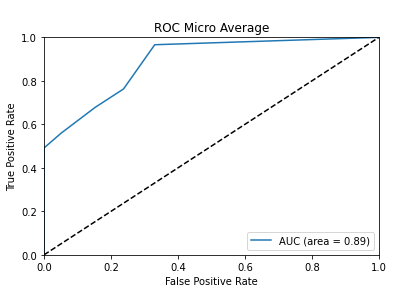

In [42]:
y_predict_split = knnModel.predict(X_test_split)
y_proba_split = knnModel.predict_proba(X_test_split)

print("Metric scores for K-Nearest Neighbors with metric = minkowski: \n")
printMetrics(y_test_split, y_predict_split, y_proba_split, knnModel)

plot_roc_curve(y_test_split, y_proba_split, 'KNN(Minkowski)')

Metric scores for K-Nearest Neighbors with metric = canberra: 

Balanced Accuracy Score: 0.944
Precision Score: 0.944
Recall Score: 0.932
F1 Score: 0.932
ROC AUC Score:  0.9995879120879122

         Confusion matrix


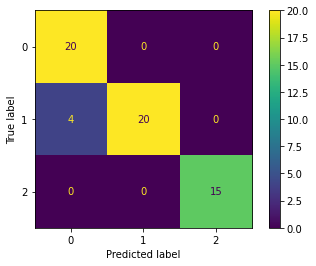

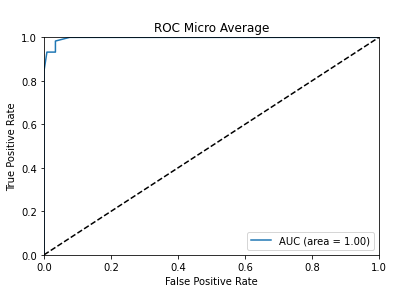

In [43]:
y_predict_split = knnModel_1.predict(X_test_split)
y_proba_split = knnModel_1.predict_proba(X_test_split)

print("Metric scores for K-Nearest Neighbors with metric = canberra: \n")
printMetrics(y_test_split, y_predict_split, y_proba_split, knnModel_1)

plot_roc_curve(y_test_split, y_proba_split, 'KNN(Canberra)')

### AdaBoost

#### Training

In [44]:
from sklearn.ensemble import AdaBoostClassifier

adaBoostModel = AdaBoostClassifier()

adaBoostModel.fit(X_train_split, y_train_split)

AdaBoostClassifier()

In [45]:
adaBoostModel_1 = AdaBoostClassifier(algorithm= 'SAMME')

adaBoostModel_1.fit(X_train_split, y_train_split)

AdaBoostClassifier(algorithm='SAMME')

#### Evaluation

Metric scores for AdaBoost with default algorithm(SAMME.R): 

Balanced Accuracy Score: 0.906
Precision Score: 0.920
Recall Score: 0.915
F1 Score: 0.914
ROC AUC Score:  0.9738095238095238

         Confusion matrix


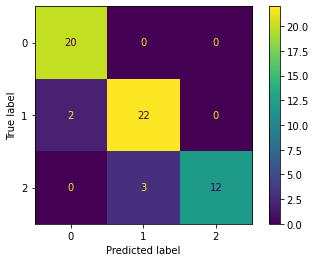

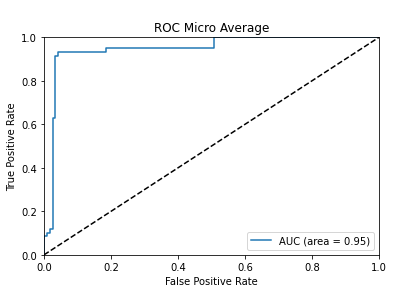

In [46]:
y_predict_split = adaBoostModel.predict(X_test_split)
y_proba_split = adaBoostModel.predict_proba(X_test_split)

print("Metric scores for AdaBoost with default algorithm(SAMME.R): \n")
printMetrics(y_test_split, y_predict_split, y_proba_split, adaBoostModel)

plot_roc_curve(y_test_split, y_proba_split, 'ADA Boost SAMME.R')


Metric scores for AdaBoost with algorithm = SAMME: 

Balanced Accuracy Score: 0.978
Precision Score: 0.984
Recall Score: 0.983
F1 Score: 0.983
ROC AUC Score:  0.9980880230880231

         Confusion matrix


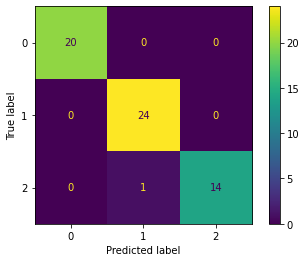

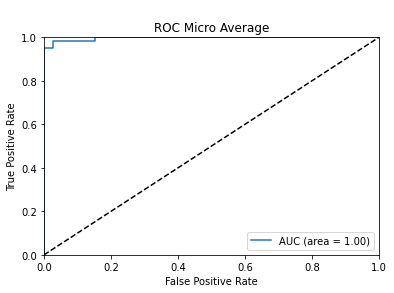

In [47]:
y_predict_split = adaBoostModel_1.predict(X_test_split)
y_proba_split = adaBoostModel_1.predict_proba(X_test_split)

print("Metric scores for AdaBoost with algorithm = SAMME: \n")
printMetrics(y_test_split, y_predict_split, y_proba_split, adaBoostModel_1)

plot_roc_curve(y_test_split, y_proba_split,'ADA Boost SAMME')

### Combined ROC Curves

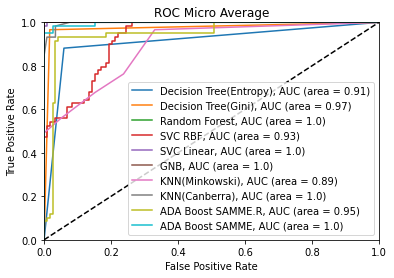

In [48]:
plt.figure
for label in combinedROCData.keys():
    fpr_microAvg, tpr_microAvg, roc_auc_microAvg, label = combinedROCData[label]
    plt.plot(fpr_microAvg, tpr_microAvg,
              label='{}, AUC (area = {})'
                    ''.format(label,str(round(roc_auc_microAvg, 2))))

plt.plot([0, 1], [0, 1], 'k--') # https://scikit-learn.org/0.15/auto_examples/plot_roc.html
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Micro Average')
plt.legend(loc="lower right")
plt.show()

## K-fold cross-validation

In [49]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=8, shuffle=True, random_state=42)


### Initializations and Function Definitions

In [50]:
from sklearn.preprocessing import LabelBinarizer

# Function for K-Fold Metrics Evaluation and plotting ROC Curve for each K value


# https://stackoverflow.com/questions/45118093/inverse-process-of-label-binarisation-in-python

# Binarize the output 
lb = LabelBinarizer()

combinedROCData = {}

def kfold_metric_evaluation(kf, model, label):
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)
    fold_bal_acc = []
    fold_precision = []
    fold_recall = []
    fold_f1 = []
    fold_roc_auc = []
    confusion_matrices = []
        
    k = 1
    plt.figure()
    # loop through each fold
    for train_index, test_index in kf.split(X):
            
        # split the data into train and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
            
        # train the model on the training data
        model.fit(X_train, y_train)
            
        # make predictions on the test data
        y_predict = model.predict(X_test)

        # calculate the evaluation metrics for this fold
        fold_bal_acc.append(balanced_accuracy_score(y_test, y_predict))
        fold_precision.append(precision_score(y_test, y_predict, average='weighted'))
        fold_recall.append(recall_score(y_test, y_predict, average='weighted'))
        fold_f1.append(f1_score(y_test, y_predict, average='weighted'))

        y_proba = model.predict_proba(X_test)
        fold_roc_auc.append(roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted'))

        # https://www.kaggle.com/code/kanncaa1/roc-curve-with-k-fold-cv

        #plot ROC for each k-fold
        fpr_microAvg, tpr_microAvg, threshold = roc_curve(lb.fit_transform(y_test).ravel(), y_proba.ravel()) #https://scikit-learn.org/0.15/auto_examples/plot_roc.html
        roc_auc_microAvg = auc(fpr_microAvg, tpr_microAvg)
        plt.plot(fpr_microAvg, tpr_microAvg, alpha=0.2,
                label='k = {} AUC (area = {})'
                      ''.format(k, str(round(roc_auc_microAvg, 2))))
        interp_tpr = np.interp(mean_fpr, fpr_microAvg, tpr_microAvg)
        tprs.append(interp_tpr)

        cm = confusion_matrix(y_test, y_predict, labels= model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
        confusion_matrices.append(disp)
        k = k + 1


    print("K-Fold Average Balanced Accuracy Score: %.3f" % np.mean(fold_bal_acc))
    print("K-Fold Average Precision Score: %.3f" % np.mean(fold_precision))
    print("K-Fold Average Recall Score: %.3f" % np.mean(fold_recall))
    print("K-Fold Average F1 Score: %.3f" % np.mean(fold_f1))
    print("K-Fold Average ROC AUC Score: ",  np.mean(fold_roc_auc))

    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue',label='Mean AUC (area ={})'.format(str(round(mean_auc, 2))))

    # For combined ROC Curve
    combinedROCData[label] = (mean_fpr, mean_tpr, mean_auc, label)

    # For plotting ROC Curve
    plt.plot([0, 1], [0, 1], 'k--') # https://scikit-learn.org/0.15/auto_examples/plot_roc.html
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Micro Average')
    plt.legend(loc="lower right")

    # For displaying confusion metrics
    fig, axs = plt.subplots(2, 4, figsize=(15, 7))
    fig.tight_layout()
    for i in range(0, len(confusion_matrices)):
        ax = axs[int(i/4), int(i % 4)]    
        confusion_matrices[i].plot(ax= ax)
        ax.set_title('Confusion Matrix for K = ' + str(i + 1))
    plt.show()


### Decision Tree

Metric scores for Decision Tree with criterion  = Gini: 

K-Fold Average Balanced Accuracy Score: 0.908
K-Fold Average Precision Score: 0.910
K-Fold Average Recall Score: 0.904
K-Fold Average F1 Score: 0.905
K-Fold Average ROC AUC Score:  0.9257777978922522


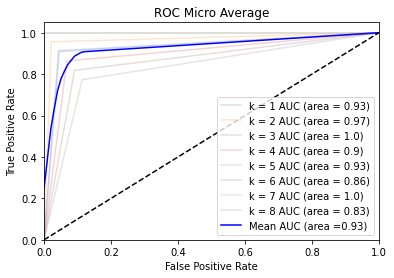

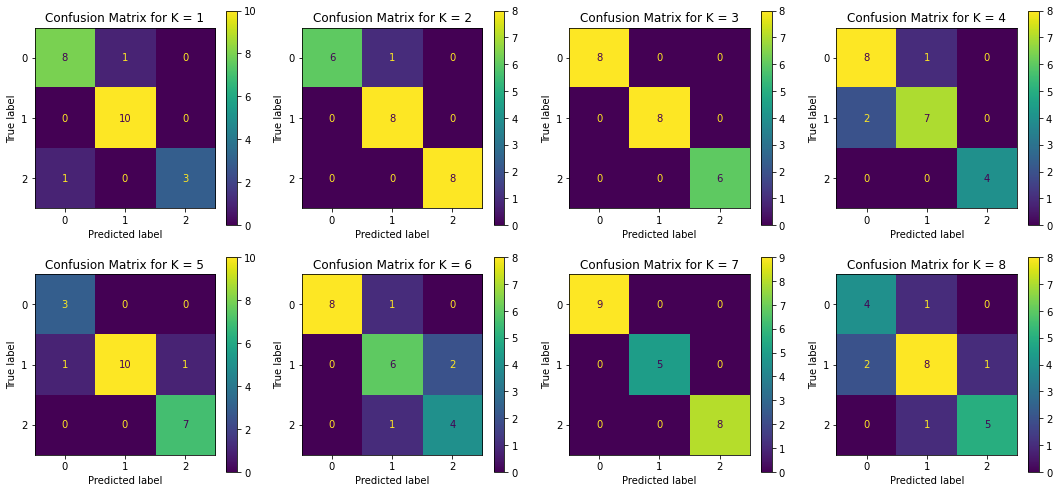

In [51]:
print("Metric scores for Decision Tree with criterion  = Gini: \n")
kfold_metric_evaluation(kf,decisionTreeModel_1,'Decision Tree(Gini)')

Metric scores for Decision Tree with criterion  = Entropy: 

K-Fold Average Balanced Accuracy Score: 0.940
K-Fold Average Precision Score: 0.959
K-Fold Average Recall Score: 0.950
K-Fold Average F1 Score: 0.946
K-Fold Average ROC AUC Score:  0.9610078646843354


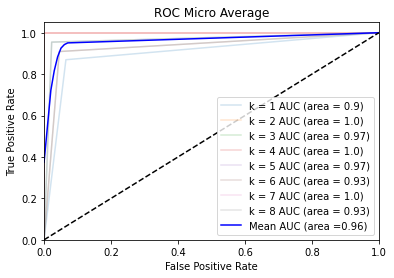

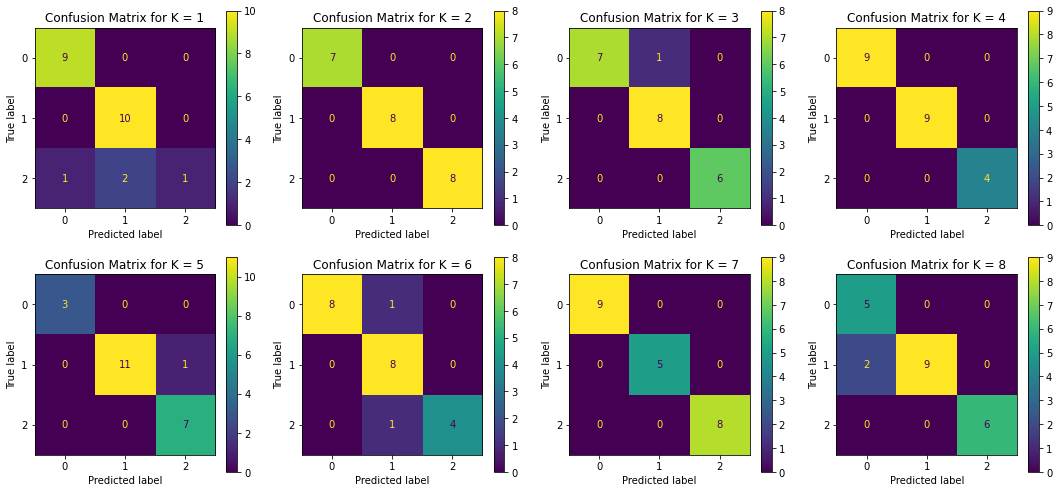

In [52]:
print("Metric scores for Decision Tree with criterion  = Entropy: \n")
kfold_metric_evaluation(kf,decisionTreeModel,'Decision Tree(Entropy)')

### Random Forest

Metric scores for Random Forest: 

K-Fold Average Balanced Accuracy Score: 0.988
K-Fold Average Precision Score: 0.986
K-Fold Average Recall Score: 0.983
K-Fold Average F1 Score: 0.983
K-Fold Average ROC AUC Score:  0.9995941558441559


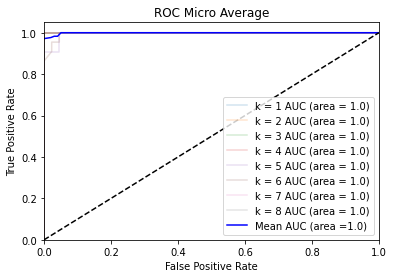

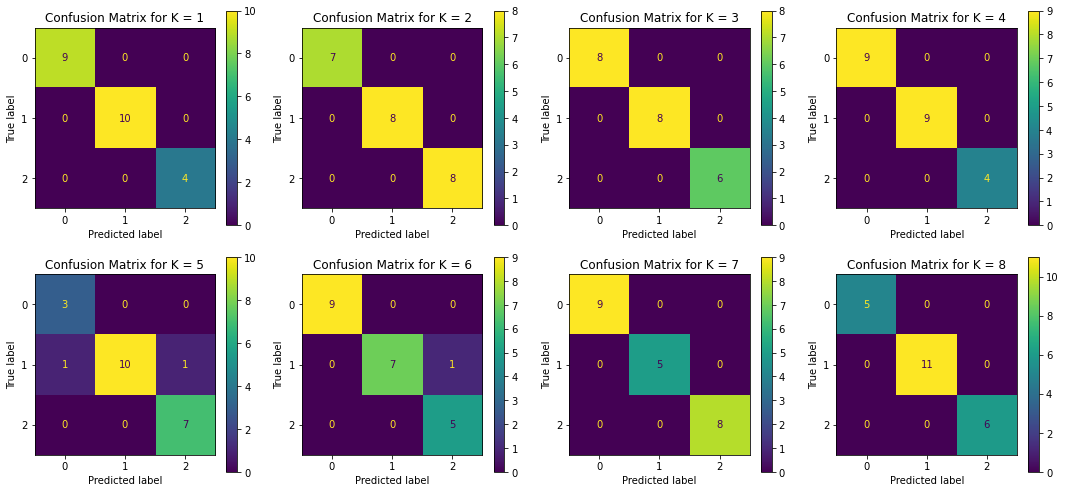

In [53]:
print("Metric scores for Random Forest: \n")
kfold_metric_evaluation(kf,randomForestModel, 'Random Forest')

### SVC

Metric scores for SVC with kernel  = RBF: 

K-Fold Average Balanced Accuracy Score: 0.657
K-Fold Average Precision Score: 0.676
K-Fold Average Recall Score: 0.685
K-Fold Average F1 Score: 0.663
K-Fold Average ROC AUC Score:  0.8805473272666584


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


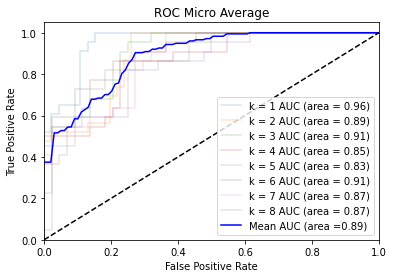

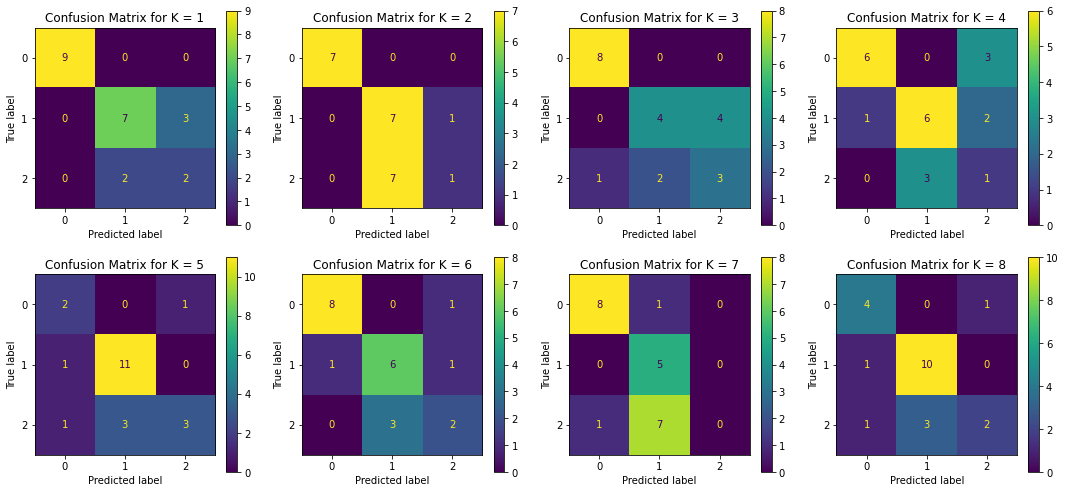

In [54]:
print("Metric scores for SVC with kernel  = RBF: \n")
kfold_metric_evaluation(kf,svcRbfModel, 'SVC RBF')

Metric scores for SVC with kernel  = Linear: 

K-Fold Average Balanced Accuracy Score: 0.961
K-Fold Average Precision Score: 0.963
K-Fold Average Recall Score: 0.955
K-Fold Average F1 Score: 0.955
K-Fold Average ROC AUC Score:  0.9946137196137197


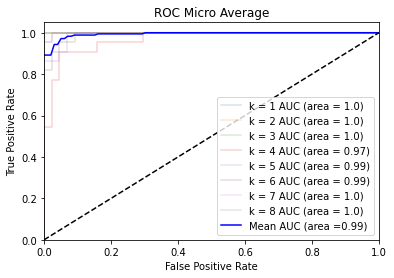

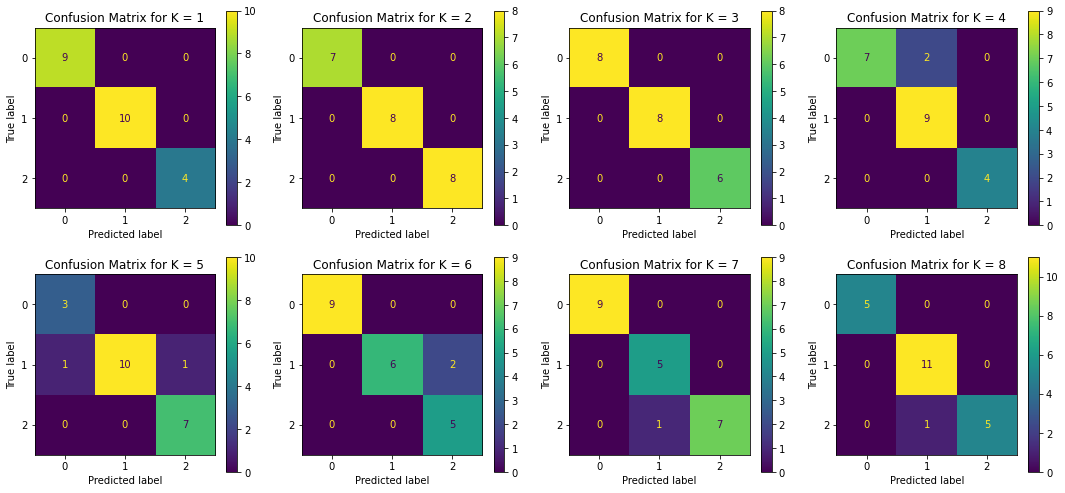

In [55]:
print("Metric scores for SVC with kernel  = Linear: \n")
kfold_metric_evaluation(kf,svcLinearModel, 'SVC Linear')

### Gaussian naive Bayes

Metric scores for Gaussian Naive Bayes: 

K-Fold Average Balanced Accuracy Score: 0.980
K-Fold Average Precision Score: 0.980
K-Fold Average Recall Score: 0.977
K-Fold Average F1 Score: 0.977
K-Fold Average ROC AUC Score:  0.9983141858141857


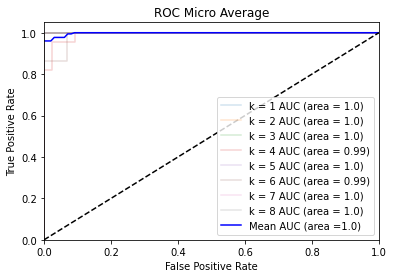

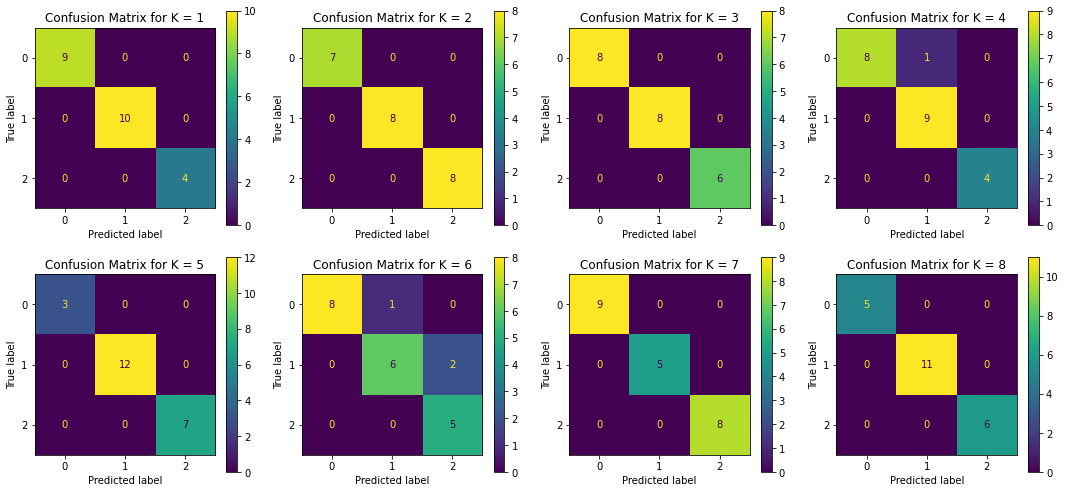

In [56]:
print("Metric scores for Gaussian Naive Bayes: \n")
kfold_metric_evaluation(kf,gNbModel, 'GNB')

### K Nearest Neighbors

Metric scores for K-Nearest Neighbors with metric = minkowski: 

K-Fold Average Balanced Accuracy Score: 0.663
K-Fold Average Precision Score: 0.675
K-Fold Average Recall Score: 0.663
K-Fold Average F1 Score: 0.651
K-Fold Average ROC AUC Score:  0.8591563293907083


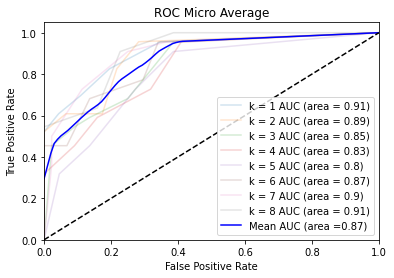

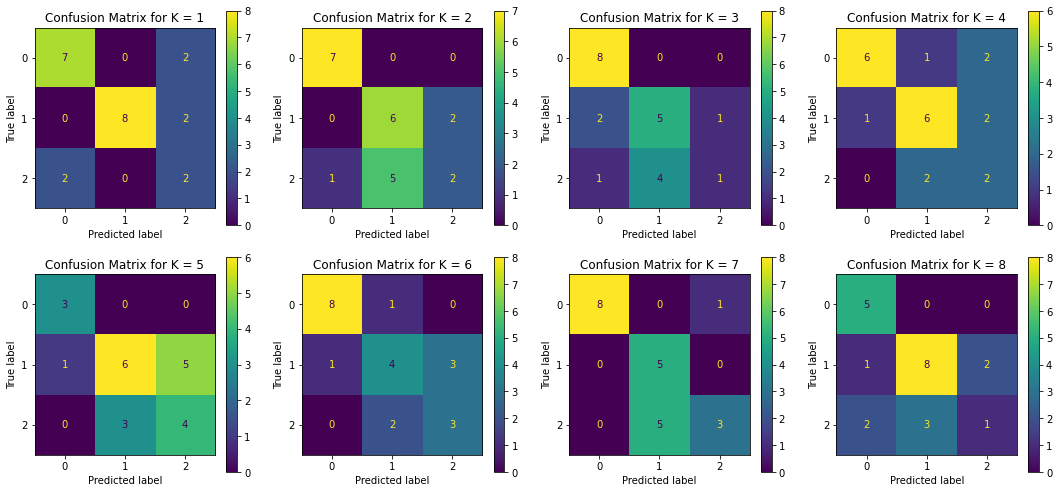

In [57]:
print("Metric scores for K-Nearest Neighbors with metric = minkowski: \n")
kfold_metric_evaluation(kf, knnModel, 'KNN(Minkowski)')

Metric scores for K-Nearest Neighbors with metric = canberra: 

K-Fold Average Balanced Accuracy Score: 0.970
K-Fold Average Precision Score: 0.969
K-Fold Average Recall Score: 0.960
K-Fold Average F1 Score: 0.961
K-Fold Average ROC AUC Score:  0.99974173553719


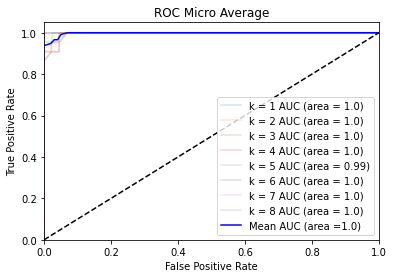

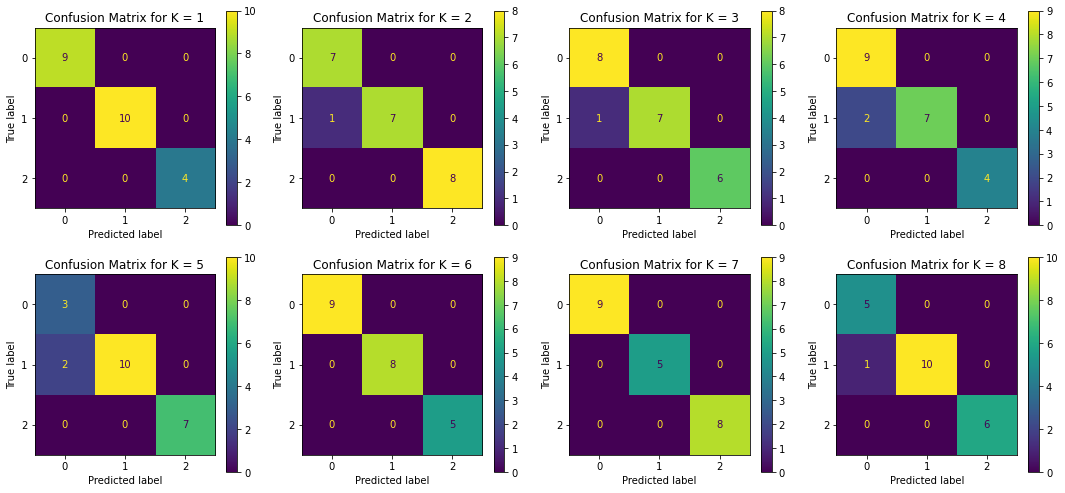

In [58]:
print("Metric scores for K-Nearest Neighbors with metric = canberra: \n")
kfold_metric_evaluation(kf, knnModel_1, 'KNN(Canberra)')

### AdaBoost

Metric scores for AdaBoost with default algorithm(SAMME.R): 

K-Fold Average Balanced Accuracy Score: 0.841
K-Fold Average Precision Score: 0.868
K-Fold Average Recall Score: 0.849
K-Fold Average F1 Score: 0.846
K-Fold Average ROC AUC Score:  0.9246531946487739


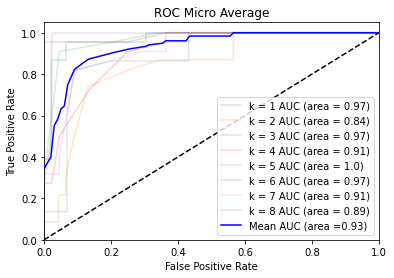

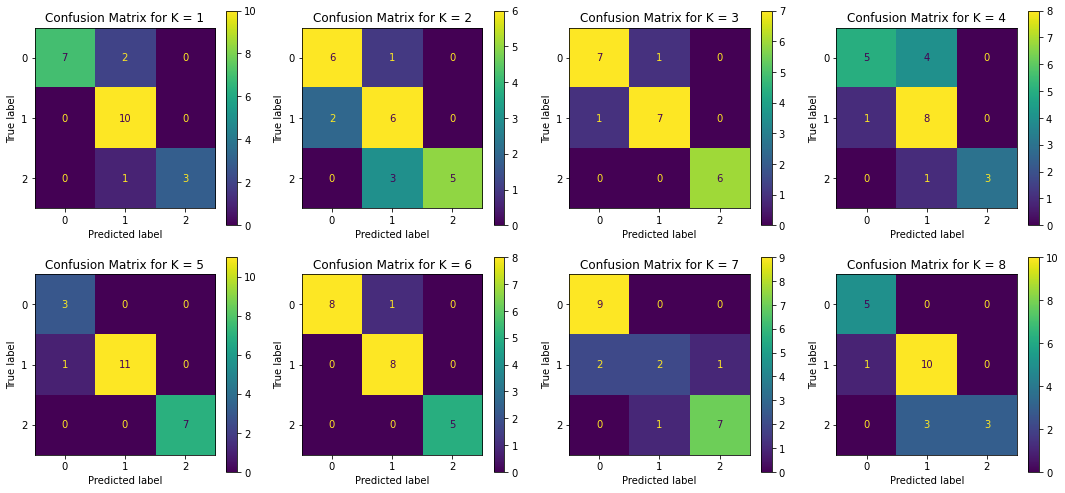

In [59]:
print("Metric scores for AdaBoost with default algorithm(SAMME.R): \n")
kfold_metric_evaluation(kf, adaBoostModel, 'ADA BOOST SAMME.R')

Metric scores for AdaBoost with algorithm = SAMME : 

K-Fold Average Balanced Accuracy Score: 0.951
K-Fold Average Precision Score: 0.955
K-Fold Average Recall Score: 0.949
K-Fold Average F1 Score: 0.949
K-Fold Average ROC AUC Score:  0.9941319716069162


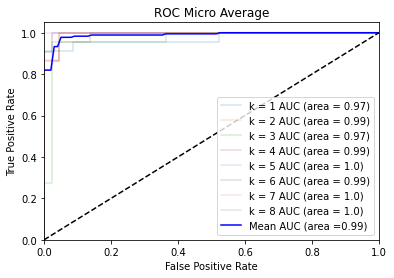

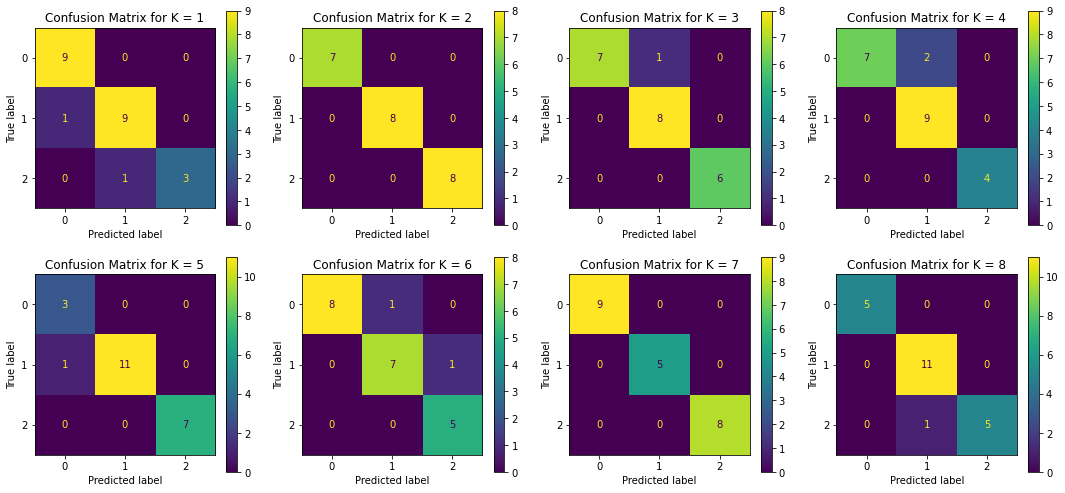

In [60]:
print("Metric scores for AdaBoost with algorithm = SAMME : \n")
kfold_metric_evaluation(kf, adaBoostModel_1, 'ADA BOOST SAMME')

### Combined ROC Curves

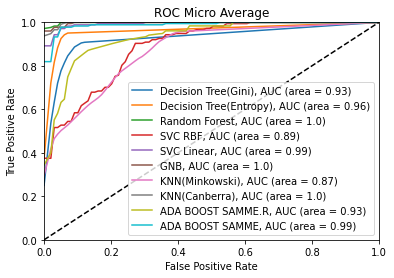

In [61]:
plt.figure
for label in combinedROCData.keys():
    mean_fpr, mean_tpr, mean_auc, label = combinedROCData[label]
    plt.plot(mean_fpr, mean_tpr,
              label='{}, AUC (area = {})'
                    ''.format(label,str(round(mean_auc, 2))))

plt.plot([0, 1], [0, 1], 'k--') # https://scikit-learn.org/0.15/auto_examples/plot_roc.html
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Micro Average')
plt.legend(loc="lower right")
plt.show()

# References

1. *numpy.count_nonzero — NumPy v1.24 Manual.* Available at: https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html (Accessed: Feb 16, 2023).

2. Kumar, V. and Jeffhale (2018) *scikit learn - Inverse Process of Label Binarisation in Python - Stack Overflow*. Available at: https://stackoverflow.com/questions/45118093/inverse-process-of-label-binarisation-in-python (Accessed: Feb 19, 2023).

3. *2.3. Clustering.* Available at: https://scikit-learn/stable/modules/clustering.html (Accessed: Feb 20, 2023).

4. *Creating multiple subplots using plt.subplots — Matplotlib 3.7.0 documentation.* Available at: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html (Accessed: Feb 19, 2023).

5. *Distance computations (scipy.spatial.distance) — SciPy v1.10.1 Manual.* Available at: https://docs.scipy.org/doc/scipy/reference/spatial.distance.html (Accessed: Feb 20, 2023).

6. *Receiver Operating Characteristic (ROC) — scikit-learn 0.15-git documentation.* Available at: https://scikit-learn.org/0.15/auto_examples/plot_roc.html (Accessed: Feb 19, 2023).

7. 'ROC Curve with k-Fold CV', *Kaggle.* Available at: https://www.kaggle.com/code/kanncaa1/roc-curve-with-k-fold-cv/notebook (Accessed: Feb 16, 2023).

8. *sklearn.cluster.OPTICS.* Available at: https://scikit-learn/stable/modules/generated/sklearn.cluster.OPTICS.html (Accessed: Feb 16, 2023).

9. *sklearn.cluster.SpectralClustering.* Available at: https://scikit-learn/stable/modules/generated/sklearn.cluster.SpectralClustering.html (Accessed: Feb 16, 2023).

10. *sklearn.ensemble.AdaBoostClassifier.* Available at: https://scikit-learn/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html (Accessed: Feb 19, 2023).

11. *sklearn.ensemble.RandomForestClassifier.* Available at: https://scikit-learn/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (Accessed: Feb 21, 2023).

12. *sklearn.metrics.confusion_matrix.* Available at: https://scikit-learn/stable/modules/generated/sklearn.metrics.confusion_matrix.html (Accessed: Feb 19, 2023).

13. *sklearn.metrics.ConfusionMatrixDisplay.* Available at: https://scikit-learn/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html (Accessed: Feb 19, 2023).

14. *sklearn.neighbors.KNeighborsClassifier.* Available at: https://scikit-learn/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html (Accessed: Feb 19, 2023).

15. *sklearn.tree.DecisionTreeClassifier.* Available at: https://scikit-learn/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (Accessed: Feb 19, 2023).

16. Brownlee, J. (2020) '10 Clustering Algorithms With Python', *MachineLearningMastery.com,* -04-05T19:00:02+00:00. Available at: https://machinelearningmastery.com/clustering-algorithms-with-python/ (Accessed: Feb 16, 2023).
